In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set()  #if you want to use seaborn themes with matplotlib functions

Let's generate some random data set based on true model f(x)

$$
y=f(x)=x+2x^2-3x^3+\epsilon
$$

In [2]:
np.random.randn(5)

array([-1.65391336,  0.67013131,  0.66871972,  1.34993184,  0.32358877])

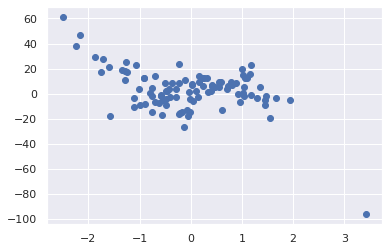

In [4]:
np.random.seed(102)
x = np.random.randn(100)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0,2,100)
plt.scatter(x,y)
plt.show()

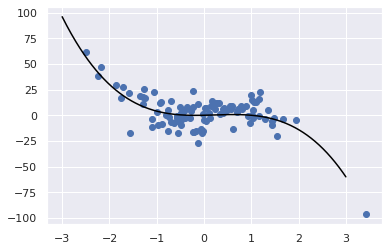

In [5]:
plt.scatter(x,y)
# let's add the unobservable true model
w=np.linspace(-3,3,500)
z= w+2 * (w ** 2) -3 * (w ** 3)
plt.plot(w,z, c='black')
plt.show()

### Polynomial transformation of the data

In [6]:
poly = PolynomialFeatures(degree =10)

In [8]:
print(type(x))
x[0:5]

<class 'numpy.ndarray'>


array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847])

In [9]:
x.reshape(-1,1) [0:5]
# this is equivalent to x.reshape(100,1)[0:5]

array([[ 1.6680683 ],
       [ 0.92586182],
       [ 1.05799677],
       [-0.92033901],
       [ 1.29974847]])

In [10]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249,21.541849,35.933275,59.939156,99.982606,166.777815
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348,0.629908,0.583208,0.539970,0.499937,0.462873
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628,1.402510,1.483851,1.569910,1.660960,1.757290
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297,0.607697,-0.559287,0.514734,-0.473730,0.435992
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339,4.821208,6.266358,8.144689,10.586047,13.759198


### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_hat_te = model.predict(X_test)

In [14]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_te, 'resid': y_test - y_hat_te})
df_predictions.head()

,y_test,y_hat_test,resid
0,-5.403786,-3.474959,-1.928826
1,-14.957215,-1.383075,-13.574140
2,61.375324,-151.901283,213.276607
3,-17.744152,20.013897,-37.758048
4,-15.849248,-1.603973,-14.245275


### Plotting the train data regression function

In [15]:
y_hat_tr = model.predict(X_train)
type(y_hat_tr)

numpy.ndarray

In [16]:
np.c_[X_train[1],y_hat_tr][:5]

array([[ 0.99718968,  7.46927188],
       [-0.50984497, -3.10530288],
       [-0.92033901,  2.83423479],
       [-0.48492775, -3.1088848 ],
       [-0.79430004, -0.20982046]])

In [17]:
prediction_tr =pd.DataFrame(np.c_[X_train[1],y_hat_tr], columns=['x','y_hat_tr'])
prediction_tr.head()

,x,y_hat_tr
0,0.997190,7.469272
1,-0.509845,-3.105303
2,-0.920339,2.834235
3,-0.484928,-3.108885
4,-0.794300,-0.209820


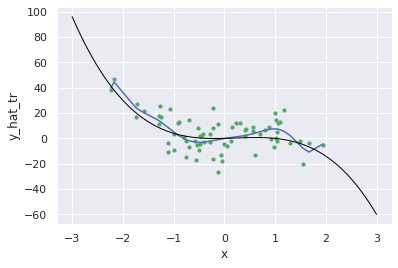

In [18]:
# plotting the fitted line vs true (unobservable) line.
sns.lineplot(x='x',y='y_hat_tr', data=prediction_tr)
plt.scatter(X_train[1], y_train, s=10, c='g')
plt.plot(w,z, c='black', linewidth=1)

plt.show()

### Comparing the MSE_train and MSE_test

In [20]:
err_tr = y_train - y_hat_tr
MSE_train = np.mean(np.square(err_tr))
round(MSE_train,2)

94.8

In [21]:
err_te= y_test - y_hat_te
MSE_test = np.mean(np.square(err_te))
round(MSE_test,2)

74376445.0

## All in one function

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    
    return poly_degree, RMSE_train, RMSE_test

In [24]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 9.94, 44.58)

In [25]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 12.65, 20.74)

In [26]:
returns= []
for i in range(1,6):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,12.65,20.74
1,2,11.32,29.15
2,3,10.24,10.20
3,4,10.06,33.45
4,5,9.94,44.58


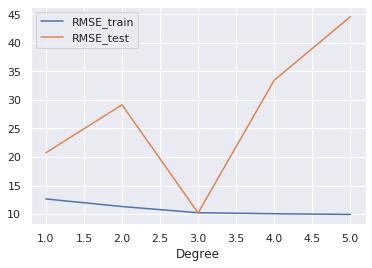

In [27]:
output.set_index('Degree').plot()
plt.show()

by looking at the table and graph above, what is the optimal poly degree?

But what if we don't have the labeled test set? we will estimate it by cross validation.

## Finding the optimal polynomial degree : CV

### Cross validation

In [29]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [30]:
model = LinearRegression()

In [31]:
# recall our d=5 so far! 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
32,1.0,0.997190,0.994387,0.991593,0.988806,0.986027,0.983256,0.980493,0.977737,0.974990,0.972250
6,1.0,-0.509845,0.259942,-0.132530,0.067570,-0.034450,0.017564,-0.008955,0.004566,-0.002328,0.001187
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297,0.607697,-0.559287,0.514734,-0.473730,0.435992
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815,0.013004,-0.006306,0.003058,-0.001483,0.000719
51,1.0,-0.794300,0.630913,-0.501134,0.398051,-0.316172,0.251135,-0.199477,0.158444,-0.125852,0.099965


In [33]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )

In [34]:
NMSE

array([ -126.51144226,   -93.96411026, -4984.4157232 ,  -144.08607987,
         -88.40811262,  -262.42036324,  -127.90852954,  -656.86177498,
         -61.52302379,  -207.62849473])

In [35]:
MSE_CV= np.mean(-NMSE)
MSE_CV

675.3727654498582

In [36]:
RMSE_CV = np.sqrt(-NMSE).mean()
RMSE_CV

18.83391338863174

In [37]:
RMSE_CV=[]
iterator= range(1,8) # the second number is polynomial degree 
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['Poly degree'])
output['RMSE_CV']=RMSE_CV

output

,Poly degree,RMSE_CV
0,1,13.312919
1,2,12.571895
2,3,10.864611
3,4,11.489488
4,5,10.532328
5,6,10.554299
6,7,14.307515


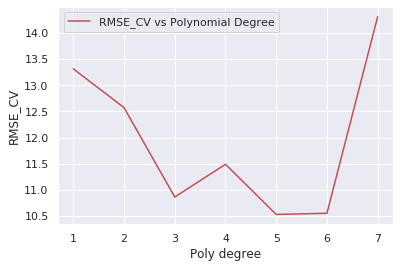

In [39]:
sns.lineplot(x='Poly degree', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs Polynomial Degree")
plt.show()

# Done!